In [4]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('scenario/scenario.csv')
df.head()

,no,scenario_num,scenario,epoch,drop_rate,learning_rate,weight_decay,vocabulary,vocabulary_total,n_heads,train_acc,test_acc,train_loss,test_loss,time
0,1,1,epoch,20,0.5,0.001,0.01,NaN,8898,1,0.9075,0.932790,0.2687,0.192229,01:19
1,2,1,epoch,40,0.5,0.001,0.01,NaN,8898,1,0.9592,0.940937,0.1214,0.167301,02:27
2,3,1,epoch,60,0.5,0.001,0.01,NaN,8898,1,0.9765,0.951120,0.0723,0.165894,03:41
3,4,1,epoch,80,0.5,0.001,0.01,NaN,8898,1,0.9858,0.951120,0.0411,0.243621,04:50
4,5,1,epoch,100,0.5,0.001,0.01,NaN,8898,1,0.9900,0.955193,0.0322,0.187478,06:03


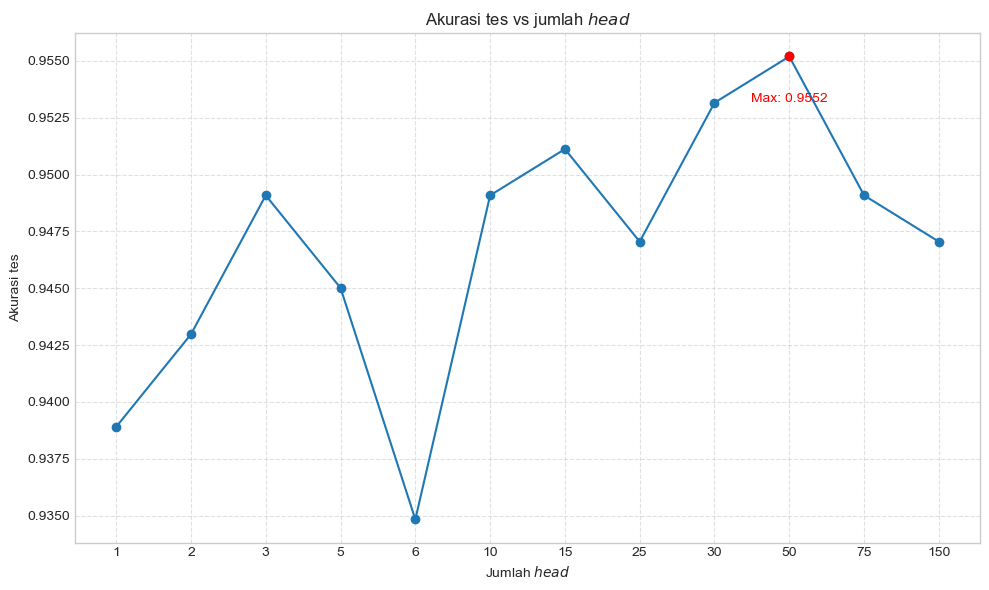

In [44]:
n_head = df[df['scenario'] == 'n_heads'].sort_values(by='n_heads')

# Convert n_heads to string for categorical spacing
x_labels = n_head['n_heads'].astype(str)
x_positions = range(len(x_labels))  # Even spacing

# Plot
plt.figure(figsize=(10, 6))
plt.plot(x_positions, n_head['test_acc'], marker='o', linestyle='-', color='tab:blue')

# Highlight max accuracy
max_idx = n_head['test_acc'].idxmax()
max_x = n_head.index.get_loc(max_idx)
max_y = n_head.loc[max_idx, 'test_acc']

plt.plot(max_x, max_y, 'ro')
plt.text(max_x, max_y - 0.002, f'Max: {max_y:.4f}', ha='center', color='red', fontsize=10)

# Set custom x-axis ticks
plt.xticks(ticks=x_positions, labels=x_labels)

# Labels and title
plt.xlabel('Jumlah $\it{head}$')
plt.ylabel('Akurasi tes')
plt.title('Akurasi tes vs jumlah $\it{head}$')
# plt.xlabel(r"$\it{Number\ of\ Attention\ Heads\ (n\_heads)}$")

plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8-whitegrid')

def plot_scenario_barh(df, scenario_name, title, xlabel, ylabel):
    data = df[df['scenario'] == scenario_name]
    if data.empty:
        print(f"No data found for scenario '{scenario_name}'")
        return

    # Extract x and y values
    x_vals = data['test_acc']
    y_vals = data[scenario_name]

    # Identify max accuracy
    max_index = data['test_acc'].idxmax()
    max_value = data.loc[max_index, 'test_acc']
    max_y = data.loc[max_index, scenario_name]

    # Colors
    colors = ['tab:red' if val == max_value else 'tab:blue' for val in data['test_acc']]

    # Determine if categorical
    is_categorical = not pd.api.types.is_numeric_dtype(y_vals)

    # Bar height
    bar_height = 0.4 if is_categorical else (
        0.03 if len(y_vals.unique()) > 1 and min(abs(j - i) for i, j in zip(sorted(y_vals.unique())[:-1], sorted(y_vals.unique())[1:])) < 0.01 else 0.1
    )

    # Sort bars if categorical (optional, for visual clarity)
    if is_categorical:
        data = data.sort_values(by='test_acc', ascending=True)
        x_vals = data['test_acc']
        y_vals = data[scenario_name]
        colors = ['tab:red' if val == max_value else 'tab:blue' for val in x_vals]

    # Plot
    plt.figure(figsize=(9, 6))
    bars = plt.barh(y_vals, x_vals, height=bar_height, color=colors)

    # Annotate
    for bar, acc in zip(bars, x_vals):
        if acc != max_value:
            plt.text(bar.get_width() + 0.001, bar.get_y() + bar.get_height()/2,
                     f'{acc:.3f}', va='center', fontsize=9)

    # Max line and label
    plt.axvline(x=max_value, color='red', linestyle='--', linewidth=1)
    plt.text(max_value + 0.001, max_y,
             f'Max: {max_value:.3f}', color='red', fontsize=10, va='center')

    # Axis labels and limits
    plt.xlim(left=x_vals.min() - 0.01, right=1.0)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)

    if not is_categorical:
        plt.ticklabel_format(axis='y', style='plain')

    plt.tight_layout()
    plt.show()


## Epoch

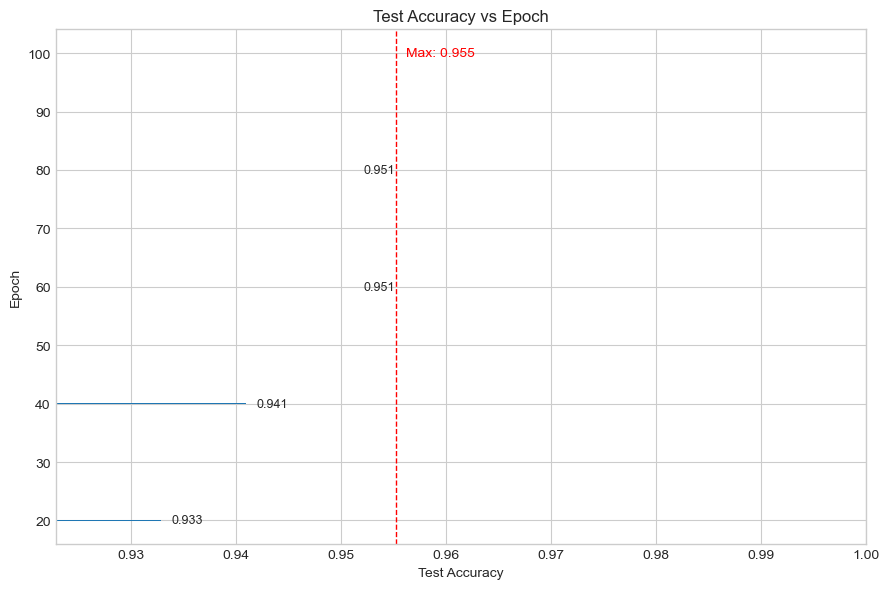

In [8]:
plot_scenario_barh(df, 'epoch', 'Test Accuracy vs Epoch', 'Test Accuracy', 'Epoch')

## Dropout

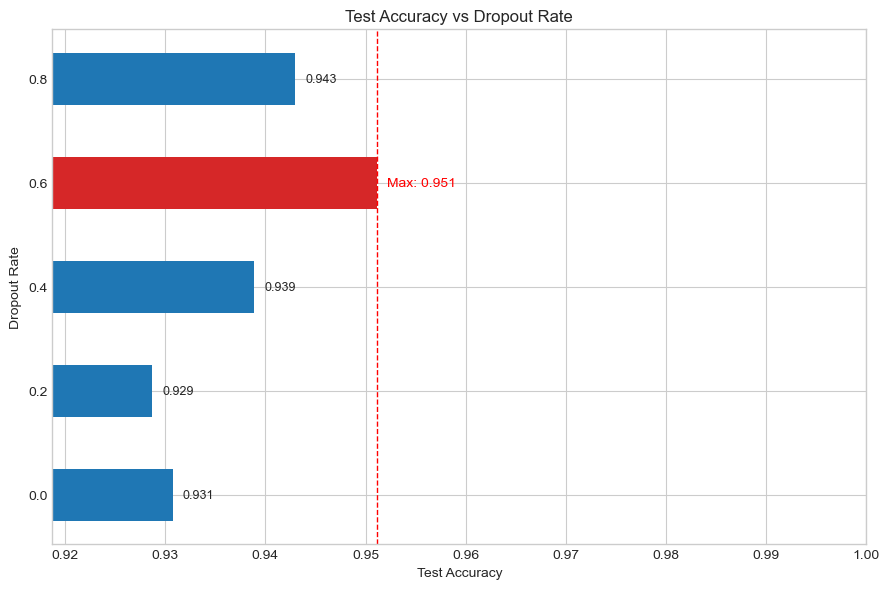

In [9]:
plot_scenario_barh(df, 'drop_rate', 'Test Accuracy vs Dropout Rate', 'Test Accuracy', 'Dropout Rate')

## Learning Rate

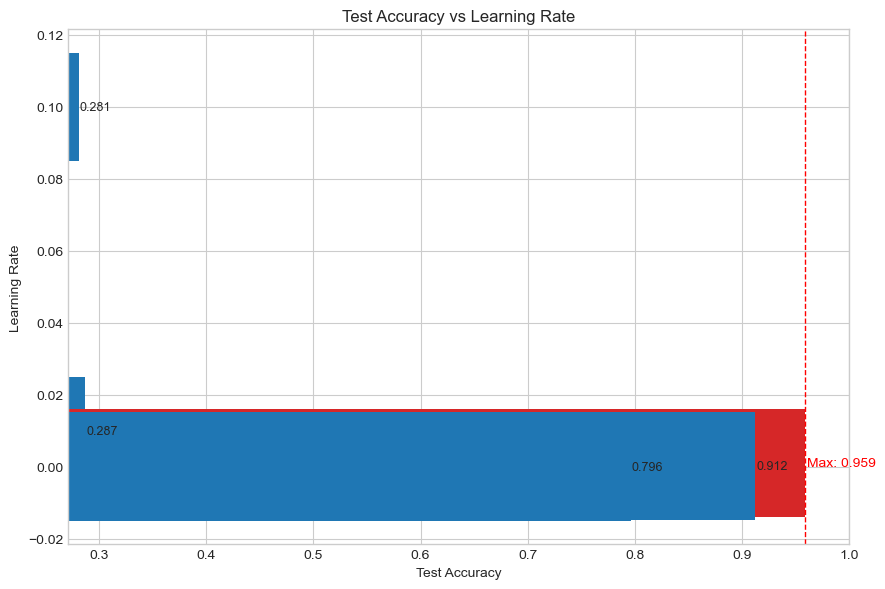

In [10]:
plot_scenario_barh(df, 'learning_rate', 'Test Accuracy vs Learning Rate', 'Test Accuracy', 'Learning Rate')

## Weight Decay

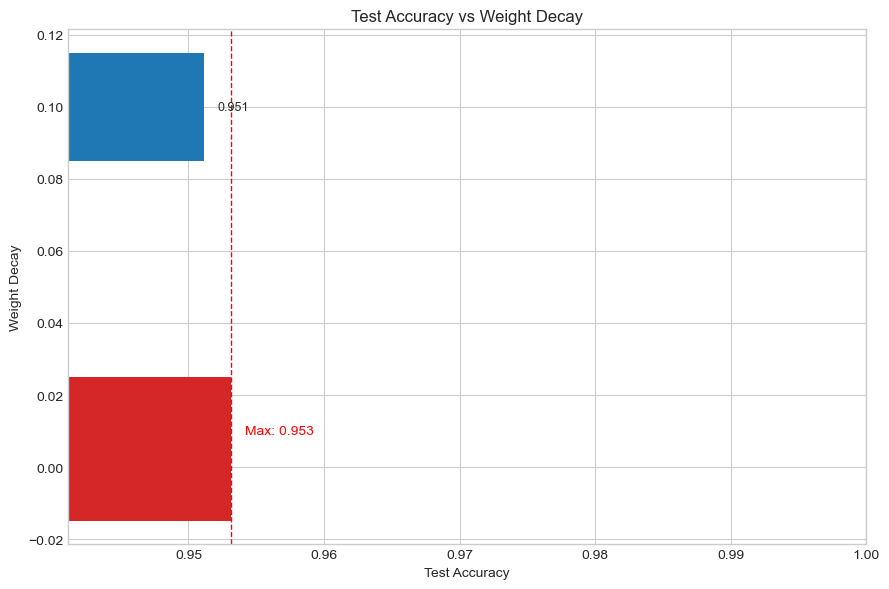

In [11]:
plot_scenario_barh(df, 'weight_decay', 'Test Accuracy vs Weight Decay', 'Test Accuracy', 'Weight Decay')

## Vocabulary

TypeError: 'value' must be an instance of str or bytes, not a float

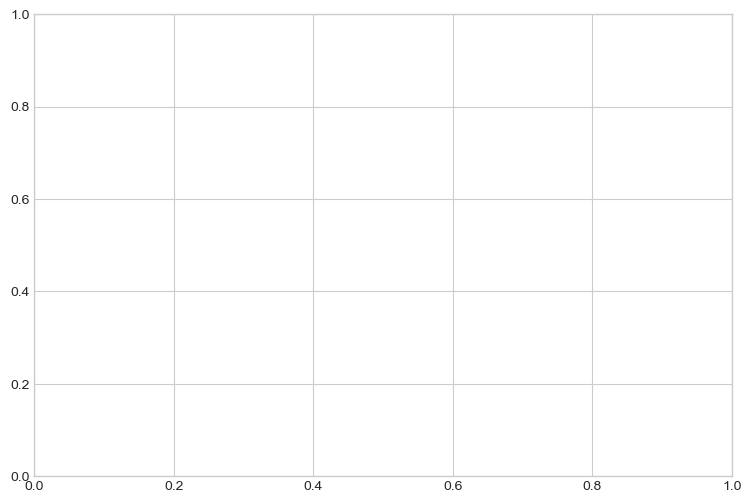

In [12]:
plot_scenario_barh(df, 'vocabulary', 'Test Accuracy vs Vocabulary', 'Test Accuracy', 'Vocabulary')